# Import all necessary libraries

In [1]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
import pandas as pd

# Load training data

In [2]:
df = pd.read_csv('/home/abhishek/Documents/NLP/Blog/spam-ham-classifier/Advertising.csv')
df.drop(['Unnamed: 0','radio','newspaper'],axis = 1 , inplace=True)
df.head()

# Display data

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


# Delete all unnecessary columns and display data

In [4]:
df.drop(['Unnamed: 0','radio','newspaper'],axis = 1 , inplace=True)

In [64]:
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
len(df)

200

# Prepare training data

In [7]:
from sklearn.model_selection import train_test_split

X = df['TV']
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Define regression model

In [8]:
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
        
def LinearRegression():
    model = Sequential()
    model.add(Dense(1, activation = 'linear', use_bias = True, 
                    input_dim = 1))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.01), 
                  loss = 'mean_squared_error', metrics = ['mae'])
    return model 

model = LinearRegression()

Using TensorFlow backend.


# Define callback

In [9]:
params_history = []
weights_history = []
bias_history = []

class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weight, bias = model.get_weights()
        B = bias[0] 
        W = weight[0][0]
        params = [W, B]
        params_history.append(params)
        weights_history.append(W)
        bias_history.append(B)
        
callback = MyCallback()

In [10]:
MODEL = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = True, callbacks=[callback])

Epoch 1/10
160/160 [==============================] - 0s 616us/step - loss: 17532.3409 - mean_absolute_error: 115.9347
Epoch 2/10
160/160 [==============================] - 0s 124us/step - loss: 10601.8944 - mean_absolute_error: 90.2615
Epoch 3/10
160/160 [==============================] - 0s 198us/step - loss: 6206.2136 - mean_absolute_error: 69.5215
Epoch 4/10
160/160 [==============================] - 0s 227us/step - loss: 3191.3705 - mean_absolute_error: 49.9227
Epoch 5/10
160/160 [==============================] - 0s 215us/step - loss: 1288.0361 - mean_absolute_error: 31.7791
Epoch 6/10
160/160 [==============================] - 0s 183us/step - loss: 342.8396 - mean_absolute_error: 16.4852
Epoch 7/10
160/160 [==============================] - 0s 238us/step - loss: 53.0198 - mean_absolute_error: 6.2254
Epoch 8/10
160/160 [==============================] - 0s 192us/step - loss: 20.3497 - mean_absolute_error: 3.8213
Epoch 9/10
160/160 [==============================] - 0s 175us/step 

In [11]:
%matplotlib inline

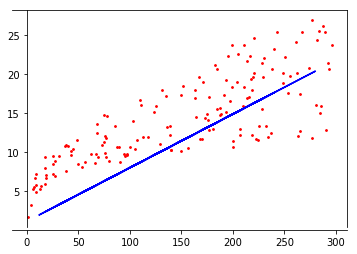

In [12]:
import matplotlib.pyplot as plt
import numpy as np

area = np.pi * 1**2

fig, ax = plt.subplots()

ax.scatter(X_train,Y_train,s = area, color = 'red')
ax.plot(X_test,model.predict(X_test),'b')

ax.spines['left'].set_position('zero')

ax.spines['right']
ax.yaxis.tick_left()

ax.spines['bottom'].set_position('zero')

ax.spines['top']
ax.xaxis.tick_bottom()

plt.show()

In [13]:
weight_matrix,bias_matrix = model.get_weights()

In [14]:
W = weight_matrix[0][0]

In [15]:
B = bias_matrix[0]

# Result obtained from prediction

In [16]:
model_ans = model.predict([100])

# Verifying if the returned params(weight + bias) is correct

# y = mx + c ~ y = Wx + B

# Result obtained from linear algebra

In [17]:
manual_ans = 100*W + B

In [18]:
model_ans

array([[7.9813137]], dtype=float32)

In [19]:
manual_ans

7.981314152479172

In [20]:
params_history[:5]

[[-0.7770129, 0.03162277],
 [-0.75634146, 0.053079467],
 [-0.73428273, 0.07277463],
 [-0.7164219, 0.08899389],
 [-0.70474535, 0.1031903]]

In [21]:
weights_history[:5]

[-0.7770129, -0.75634146, -0.73428273, -0.7164219, -0.70474535]

In [22]:
bias_history[:5]

[0.03162277, 0.053079467, 0.07277463, 0.08899389, 0.1031903]

# Weight learned through iterations

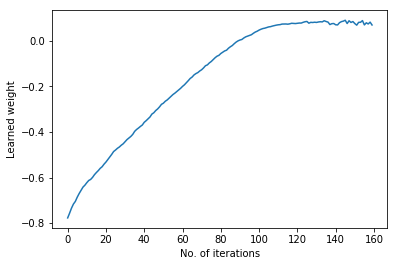

In [23]:
plt.xlabel("No. of iterations")
plt.ylabel("Learned weight")
plt.plot(weights_history)

# Bias learned through iterations

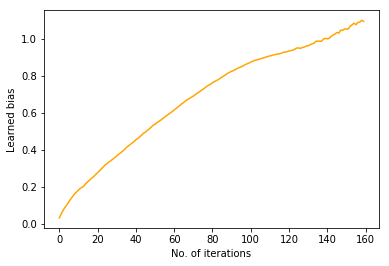

In [24]:
plt.xlabel("No. of iterations")
plt.ylabel("Learned bias")
plt.plot(bias_history, 'orange')

# Weight + Bias learned through iterations

## blue -> weight
## orange -> bias

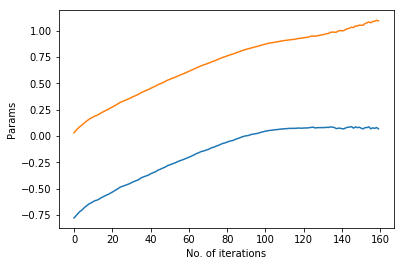

In [25]:
plt.xlabel("No. of iterations")
plt.ylabel("Params")
plt.plot(params_history)

# Cost minimization through iterations

## MAE gives a better intuition than MSE

In [62]:
dummy_cost_function = MODEL.history['mean_absolute_error']

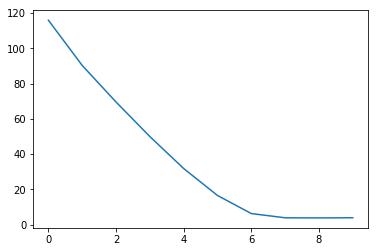

In [63]:
plt.plot(dummy_cost_function)

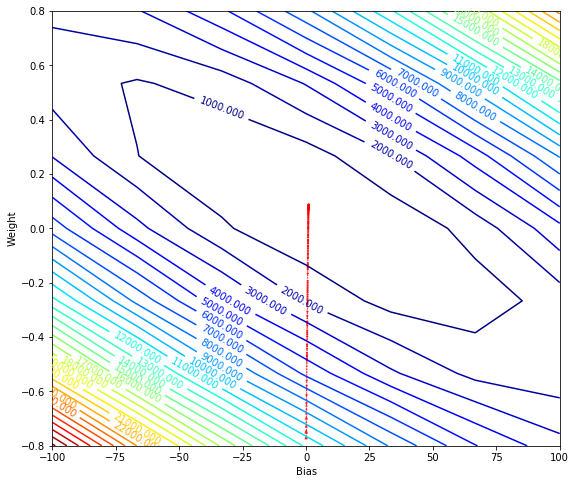

In [61]:
def costfunction(x,y,theta):
    
    m = np.size(y)
    h = np.dot(x,theta)
    
    J = float(np.dot((h - y).T,(h - y))/(m*2)); 
    #print(J)
    return J;

XX = np.array(X_train.tolist())
YY = np.array(Y_train.tolist())

XX_1 = np.vstack((np.ones(len(XX)), XX)).T

#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-100,100, 7),np.linspace(-0.8,0.8,7))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(XX_1, YY.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )

#Reshaping the cost values    
Z = zs.reshape(T0.shape)

anglesx = np.array(bias_history)[1:] - np.array(bias_history)[:-1]
anglesy = np.array(weights_history)[1:] - np.array(weights_history)[:-1]

fig = plt.figure(figsize = (20,8))

#Contour plot
ax = fig.add_subplot(1, 2, 2)
cp = ax.contour(T0, T1, Z, 30, cmap = 'jet')
ax.clabel(cp, inline=True, fontsize=10)
plt.xlabel("Bias")
plt.ylabel("Weight")
#ax.quiver()
ax.quiver(bias_history[:-1], weights_history[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)


plt.show()

In [33]:
weights_history

[-0.7770129,
 -0.75634146,
 -0.73428273,
 -0.7164219,
 -0.70474535,
 -0.68610704,
 -0.67012405,
 -0.6564005,
 -0.6419568,
 -0.63349223,
 -0.62250406,
 -0.61286765,
 -0.6083163,
 -0.5992432,
 -0.5874036,
 -0.5780732,
 -0.5695756,
 -0.5596631,
 -0.55260074,
 -0.5413583,
 -0.53206426,
 -0.5210778,
 -0.5103699,
 -0.49852282,
 -0.48599714,
 -0.47934842,
 -0.47179857,
 -0.46602273,
 -0.45828375,
 -0.4520523,
 -0.44245458,
 -0.43358532,
 -0.42687064,
 -0.41972634,
 -0.41072255,
 -0.39747387,
 -0.3892844,
 -0.38294122,
 -0.37591794,
 -0.3696247,
 -0.35777724,
 -0.35071313,
 -0.3425876,
 -0.33446586,
 -0.32176638,
 -0.31594452,
 -0.30627927,
 -0.29925415,
 -0.29000315,
 -0.27900773,
 -0.27403876,
 -0.26543686,
 -0.25977132,
 -0.25179315,
 -0.24418342,
 -0.23610517,
 -0.230003,
 -0.22310847,
 -0.21633594,
 -0.20881465,
 -0.20039427,
 -0.19333728,
 -0.1845873,
 -0.17530535,
 -0.16565357,
 -0.15947138,
 -0.15015611,
 -0.14422339,
 -0.13985494,
 -0.13277352,
 -0.12726031,
 -0.11925242,
 -0.10964628

In [34]:
bias_history

[0.03162277,
 0.053079467,
 0.07277463,
 0.08899389,
 0.1031903,
 0.119292036,
 0.13446398,
 0.14776562,
 0.16157272,
 0.17118877,
 0.18165751,
 0.19198178,
 0.19738692,
 0.20667724,
 0.21869406,
 0.22827768,
 0.23708197,
 0.24709025,
 0.25520346,
 0.26640013,
 0.27583387,
 0.286186,
 0.2960413,
 0.30734974,
 0.31846523,
 0.32565832,
 0.33440086,
 0.34126836,
 0.34995878,
 0.35741803,
 0.36645854,
 0.37582952,
 0.38302258,
 0.39138234,
 0.4003407,
 0.41208857,
 0.4202683,
 0.42798623,
 0.43616748,
 0.44362858,
 0.45409435,
 0.46126807,
 0.47034338,
 0.478601,
 0.4896933,
 0.4953466,
 0.5047304,
 0.5124715,
 0.5221722,
 0.5322126,
 0.53814846,
 0.5464877,
 0.55281925,
 0.5602121,
 0.56835365,
 0.57703,
 0.58409077,
 0.5912635,
 0.59878737,
 0.60680574,
 0.61555463,
 0.6228031,
 0.6311558,
 0.6394452,
 0.64862347,
 0.65560335,
 0.66463953,
 0.67108655,
 0.6769055,
 0.6835659,
 0.6896263,
 0.69726545,
 0.7060268,
 0.71150523,
 0.7194607,
 0.7263139,
 0.7344376,
 0.74218905,
 0.74932736,
 

# Bias(current) | Weight(current) => Cost(current)

## minimization of cost can be observed

In [51]:
for W,B in zip(weights_history,bias_history):
    print( str(B) + " | " + str(W) + " => " + str(costfunction(XX_1, YY.reshape(-1,1),np.array([B,W]).reshape(-1,1))))

0.03162277 | -0.7770129 => 11182.3878474
0.053079467 | -0.75634146 => 10649.3595571
0.07277463 | -0.73428273 => 10095.3259839
0.08899389 | -0.7164219 => 9657.54808173
0.1031903 | -0.70474535 => 9376.16934638
0.119292036 | -0.68610704 => 8936.42502742
0.13446398 | -0.67012405 => 8567.59340068
0.14776562 | -0.6564005 => 8257.07984297
0.16157272 | -0.6419568 => 7936.49098415
0.17118877 | -0.63349223 => 7751.40018459
0.18165751 | -0.62250406 => 7514.60537042
0.19198178 | -0.61286765 => 7309.84695727
0.19738692 | -0.6083163 => 7214.06678405
0.20667724 | -0.5992432 => 7025.17161349
0.21869406 | -0.5874036 => 6782.46354167
0.22827768 | -0.5780732 => 6594.19280666
0.23708197 | -0.5695756 => 6425.02797389
0.24709025 | -0.5596631 => 6230.50381259
0.25520346 | -0.55260074 => 6093.64234078
0.26640013 | -0.5413583 => 5879.0797871
0.27583387 | -0.53206426 => 5704.59449633
0.286186 | -0.5210778 => 5501.80549597
0.2960413 | -0.5103699 => 5307.71675522
0.30734974 | -0.49852282 => 5097.01246923
0.318465